In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Лабараторная 1.1 

## чтение файла

In [ ]:
def read_data(filename):
    return pd.read_csv(filename)

filename = 'student_scores.csv' 
data = read_data(filename)

## статистическая информация

In [17]:
def show_statistics(data, x_col, y_col):
    stats = {
        'Количество': [len(data[x_col]), len(data[y_col])],
        'Минимальное значение': [data[x_col].min(), data[y_col].min()],
        'Максимальное значение': [data[x_col].max(), data[y_col].max()],
        'Среднее значение': [data[x_col].mean(), data[y_col].mean()],
        'Стандартное отклонение': [data[x_col].std(), data[y_col].std()]
    }
    
    return pd.DataFrame(stats, index=[x_col, y_col])

x_col = 'Hours'
y_col = 'Scores'

stats = show_statistics(data, x_col, y_col)
display(stats)

,Количество,Минимальное значение,Максимальное значение,Среднее значение,Стандартное отклонение
Hours,25,1.1,9.2,5.012,2.525094
Scores,25,17.0,95.0,51.480,25.286887


## изображение исходных точек

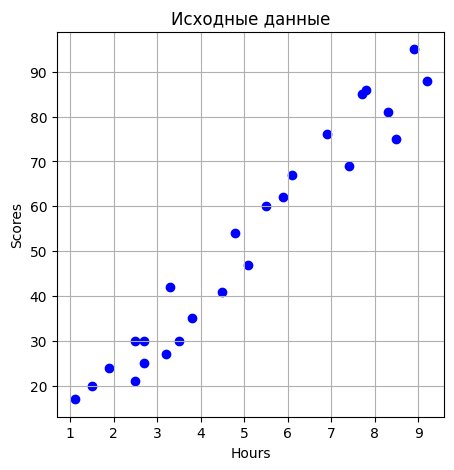

In [31]:
def plot_original_data(data, x_col, y_col, ax):
    ax.scatter(data[x_col], data[y_col], color='blue')
    ax.set_title('Исходные данные')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

fig, (ax1) = plt.subplots(1, figsize=(5, 5))
plot_original_data(data, x_col, y_col, ax1)

## параметры регрессионной прямой

In [24]:
def linear_regression(data, x_col, y_col):
    x = data[x_col]
    y = data[y_col]
    
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x * y)
    sum_x2 = sum(x ** 2)
    
    a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    b = (sum_y - a * sum_x) / n
    
    return a, b

a, b = linear_regression(data, x_col, y_col)
print(f"\nУравнение регрессионной прямой: y = {a:.2f}x + {b:.2f}")


Уравнение регрессионной прямой: y = 9.78x + 2.48


## изображение прямой

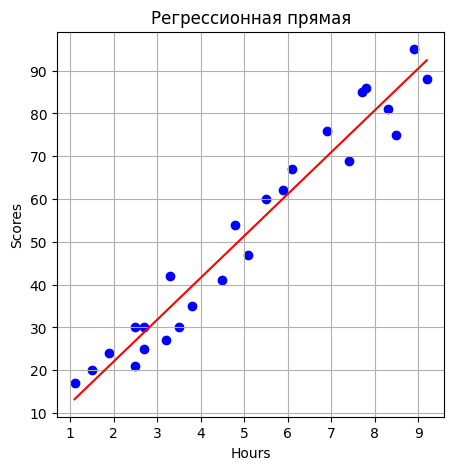

In [32]:
def plot_regression_line(data, x_col, y_col, a, b, ax):
    ax.scatter(data[x_col], data[y_col], color='blue')
    
    x_values = np.linspace(data[x_col].min(), data[x_col].max(), 100)
    y_values = a * x_values + b
    ax.plot(x_values, y_values, color='red')
    
    ax.set_title('Регрессионная прямая')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

fig, (ax2) = plt.subplots(1, figsize=(5, 5))
plot_regression_line(data, x_col, y_col, a, b, ax2)

## квадраты ошибок

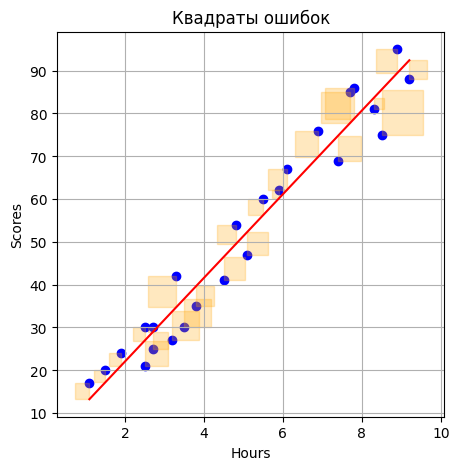

In [ ]:
def plot_error_squares(data, x_col, y_col, a, b, ax):
    ax.scatter(data[x_col], data[y_col], color='blue')
    
    x_values = np.linspace(data[x_col].min(), data[x_col].max(), 100)
    y_values = a * x_values + b
    ax.plot(x_values, y_values, color='red')
    
    transform_width = 1/10 
    
    for xi, yi in zip(data[x_col], data[y_col]):
        y_pred = a * xi + b
        error = y_pred - yi 
        width = error * transform_width
        height = error
        
        if error > 0:
            rect = Rectangle((xi, yi), width, height, 
                           edgecolor='orange', facecolor='orange', alpha=0.25)
        else:
            rect = Rectangle((xi, yi + height), width, -height, 
                           edgecolor='orange', facecolor='orange', alpha=0.25)
        ax.add_patch(rect)
    
    ax.set_title('Квадраты ошибок')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

fig, (ax3) = plt.subplots(1, figsize=(5, 5))
plot_error_squares(data, x_col, y_col, a, b, ax3)

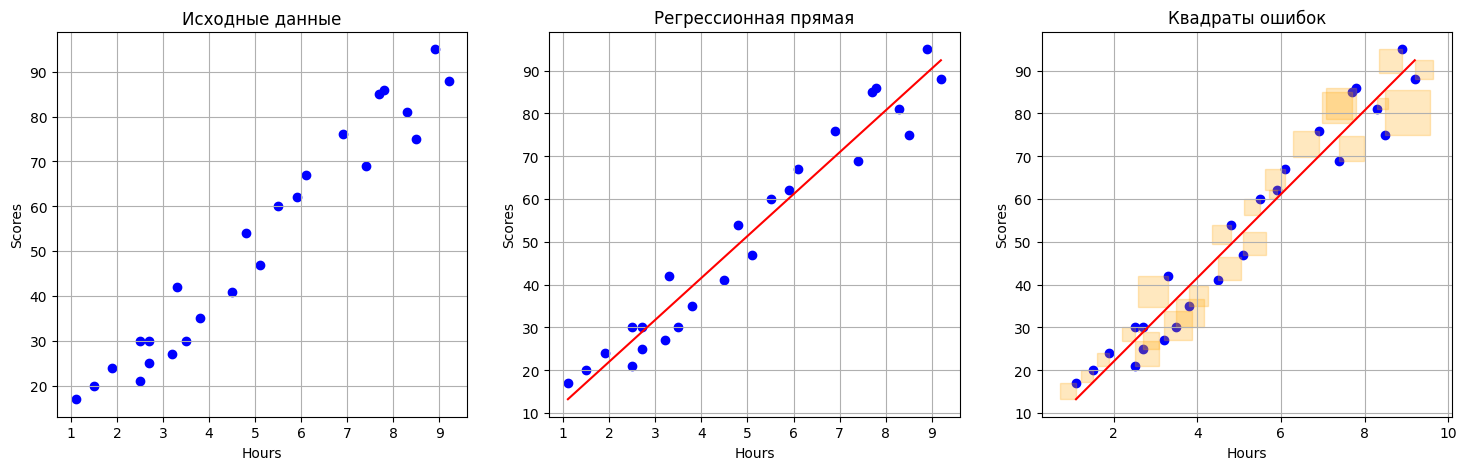

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

plot_original_data(data, x_col, y_col, ax1)
plot_regression_line(data, x_col, y_col, a, b, ax2)
plot_error_squares(data, x_col, y_col, a, b, ax3)

# Лабараторная 1.2

In [6]:

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## Загрузка и исследование данных

In [13]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## выбор столбца для регрессии и исследование данных

Корреляции с целевой переменной:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

Выбранный признак: bmi


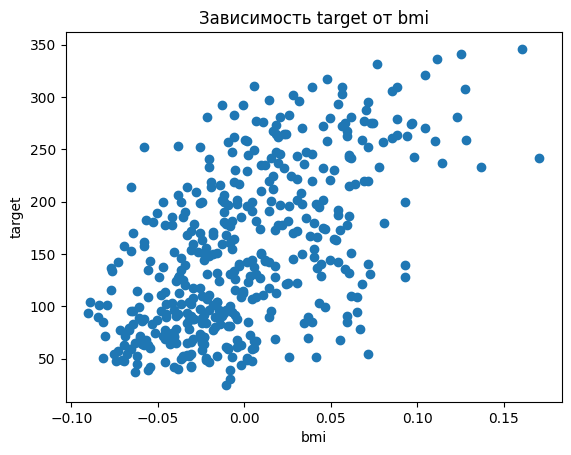

In [14]:
correlations = diabetes_df.corr()['target'].sort_values(ascending=False)
print("Корреляции с целевой переменной:")
print(correlations)

feature_name = correlations.index[1]
print(f"\nВыбранный признак: {feature_name}")

plt.scatter(diabetes_df[feature_name], diabetes_df['target'])
plt.title(f'Зависимость target от {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('target')
plt.show()

## Реализация линейной регрессии с использованием Scikit-Learn

Коэффициенты Scikit-Learn: intercept=152.29, coef=981.66
Среднеквадратичная ошибка: 4150.68
Коэффициент детерминации R^2: 0.19


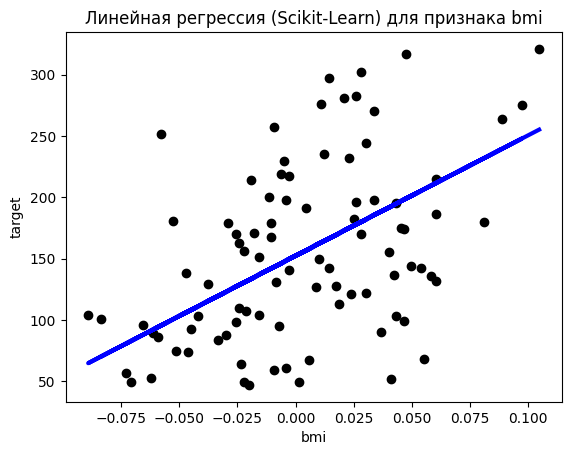

In [15]:
X = diabetes_df[[feature_name]].values
y = diabetes_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f"Коэффициенты Scikit-Learn: intercept={regressor.intercept_:.2f}, coef={regressor.coef_[0]:.2f}")
print(f"Среднеквадратичная ошибка: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Коэффициент детерминации R^2: {r2_score(y_test, y_pred):.2f}")

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title(f'Линейная регрессия (Scikit-Learn) для признака {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('target')
plt.show()

## собственный алгоритм


Коэффициенты собственной реализации: intercept=152.29, coef=981.66
Среднеквадратичная ошибка: 4150.68
Коэффициент детерминации R^2: 0.19


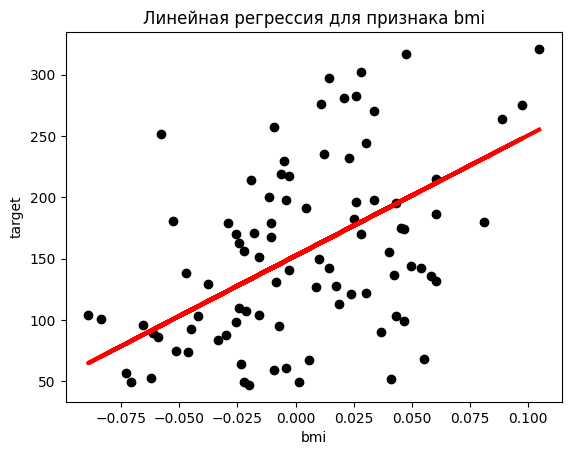

In [16]:
class MyLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y):
        # Добавляем столбец единиц для intercept
        X = np.c_[np.ones(X.shape[0]), X]
        # Вычисляем коэффициенты по методу наименьших квадратов
        XT = X.T
        XTX = np.dot(XT, X)
        XTX_inv = np.linalg.inv(XTX)
        XTy = np.dot(XT, y)
        coef = np.dot(XTX_inv, XTy)
        
        self.intercept_ = coef[0]
        self.coef_ = coef[1:]
        
    def predict(self, X):
        return self.intercept_ + np.dot(X, self.coef_)
# Создание и обучение собственной модели
my_regressor = MyLinearRegression()
my_regressor.fit(X_train, y_train)
# Прогнозирование на тестовых данных
y_pred_my = my_regressor.predict(X_test)
# Оценка качества модели
print(f"\nКоэффициенты собственной реализации: intercept={my_regressor.intercept_:.2f}, coef={my_regressor.coef_[0]:.2f}")
print(f"Среднеквадратичная ошибка: {mean_squared_error(y_test, y_pred_my):.2f}")
print(f"Коэффициент детерминации R^2: {r2_score(y_test, y_pred_my):.2f}")
# Визуализация линии регрессии
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred_my, color='red', linewidth=3)
plt.title(f'Линейная регрессия для признака {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('target')
plt.show()

## сравнение результатов


Таблица сравнения результатов:
   Actual  Scikit-Learn  My Implementation
0   321.0    255.174269         255.174269
1   215.0    211.794626         211.794626
2   127.0    161.008702         161.008702
3    64.0    129.267499         129.267499
4   175.0    196.982065         196.982065
5   275.0    247.767988         247.767988
6   179.0    123.977299         123.977299
7   232.0    174.763223         174.763223
8   142.0    205.446385         205.446385
9    99.0    198.040105         198.040105


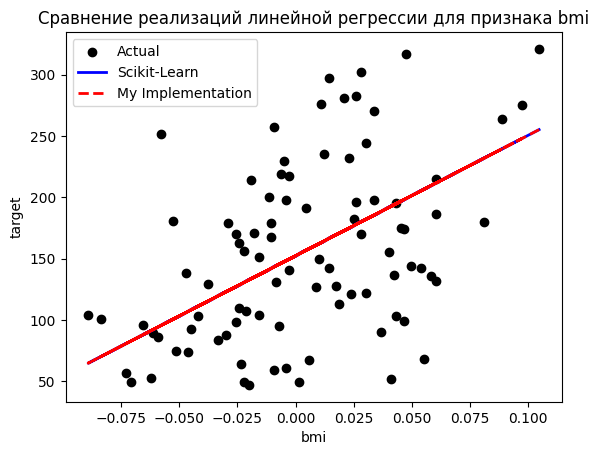

In [17]:
results = pd.DataFrame({
    'Actual': y_test,
    'Scikit-Learn': y_pred,
    'My Implementation': y_pred_my
})
print("\nТаблица сравнения результатов:")
print(results.head(10))

plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Scikit-Learn')
plt.plot(X_test, y_pred_my, color='red', linestyle='--', linewidth=2, label='My Implementation')
plt.title(f'Сравнение реализаций линейной регрессии для признака {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('target')
plt.legend()
plt.show()

# Лабараторная 1.3

In [22]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    print(f"\n{name} модель:")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.4f}%")
    print(f"Коэффициенты: intercept={y_pred[0]:.4f}, coef={y_pred[1]:.4f}")

evaluate_model("Scikit-Learn", y_test, y_pred)
evaluate_model("Собственная", y_test, y_pred_my)



Scikit-Learn модель:
MAE: 52.9437
R²: 0.1906
MAPE: 45.1690%
Коэффициенты: intercept=255.1743, coef=211.7946

Собственная модель:
MAE: 52.9437
R²: 0.1906
MAPE: 45.1690%
Коэффициенты: intercept=255.1743, coef=211.7946
